## Recurrent Neural Network

### Contents

#### 1.   Importing Dataset and Libraries
#### 2.   Defining Model Parameters and Hyperparameters
#### 3.   Displaying the images and labels for train and test from the dataset.
#### 4.   Reshaping the data so that the vectors of pixels become square arrays.
#### 5.   Defining the input and output of RNNs architecture
#### 6.   Defining the RNNs model to classify images.
#### 7.   Defining the loss and the prediction of the model
#### 8.   Training the model and display the test loss and test accuracy
 


### 1) Importing Dataset and Libraries

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

mnist = input_data.read_data_sets('./mnist', one_hot=True)              # they has been normalized to range (0,1)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 2) Defining Model parameters and Hyperparameters

In [0]:
# hyperparameters
n_neurons = 128
learning_rate = 0.001
batch_size = 128
n_epochs = 10

In [0]:
# parameters
n_steps = 28 # 28 rows
n_inputs = 28 # 28 cols
n_outputs = 10 # 10 classes

### 3) Displaying the images and labels for train and test from the dataset.

In [0]:
# Display training and label of images
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)


(55000, 784)
(55000, 10)


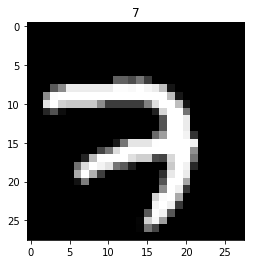

In [0]:
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[2001]))
plt.show()

### 4)  Reshaping the data so that the vectors of pixels become square arrays



In [0]:
# input data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist')
X_test = mnist.test.images # X_test shape: [num_test, 28*28]
X_test = X_test.reshape([-1, n_steps, n_inputs])
y_test = mnist.test.labels

Extracting ./mnist\train-images-idx3-ubyte.gz
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz


### 5) Defining input and output of RNN's architecture

In [0]:
# Define input and output
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

### 6) Defining the RNN model
The simple RNN layer will take a sequence of columns in an image array as inputs.

In [0]:
# Define your model
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_inputs)
output, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

### 7) Defining the loss and prediction of the RNN model

In [0]:
# Define the loss
logits = tf.layers.dense(state, n_outputs)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
prediction = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

### 8) Training the model and displaying the test loss and test accuracy

In [0]:
# initialize the variables
init = tf.global_variables_initializer()
# train the model
with tf.Session() as sess:
    sess.run(init)
    n_batches = mnist.train.num_examples // batch_size
    for epoch in range(n_epochs):
        for batch in range(n_batches):
            X_train, y_train = mnist.train.next_batch(batch_size)
            X_train = X_train.reshape([-1, n_steps, n_inputs])
            sess.run(optimizer, feed_dict={X: X_train, y: y_train})
        loss_train, acc_train = sess.run(
            [loss, accuracy], feed_dict={X: X_train, y: y_train})
        print('Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}'.format(
            epoch + 1, loss_train, acc_train))
    loss_test, acc_test = sess.run(
        [loss, accuracy], feed_dict={X: X_test, y: y_test})
    print('Test Loss: {:.3f}, Test Acc: {:.3f}'.format(loss_test, acc_test))

Epoch: 1, Train Loss: 1.062, Train Acc: 0.625
Epoch: 2, Train Loss: 1.057, Train Acc: 0.672
Epoch: 3, Train Loss: 0.644, Train Acc: 0.812
Epoch: 4, Train Loss: 0.617, Train Acc: 0.844
Epoch: 5, Train Loss: 0.471, Train Acc: 0.852
Epoch: 6, Train Loss: 0.782, Train Acc: 0.750
Epoch: 7, Train Loss: 0.479, Train Acc: 0.797
Epoch: 8, Train Loss: 0.498, Train Acc: 0.859
Epoch: 9, Train Loss: 0.409, Train Acc: 0.867
Epoch: 10, Train Loss: 0.517, Train Acc: 0.844
Test Loss: 0.382, Test Acc: 0.890
